In [1]:
# Load data-set
df.car_spec_data <- read.csv(url("http://www.sharpsightlabs.com/wp-content/uploads/2015/01/auto-snout_car-specifications_COMBINED.txt"))
df.car_spec_data$year <- as.character(df.car_spec_data$year)

In [3]:
library(dplyr)
library(ggplot2)
## Create themes
#--------------
# Create Theme
#--------------

# BASIC THEME
theme.car_chart <- 
  theme(legend.position = "none") +
  theme(plot.title = element_text(size=26, family="Trebuchet MS", face="bold", hjust=0, color="#666666")) +
  theme(axis.title = element_text(size=18, family="Trebuchet MS", face="bold", color="#666666")) +
  theme(axis.title.y = element_text(angle=0)) 


# SCATTERPLOT THEME
theme.car_chart_SCATTER <- theme.car_chart +
                            theme(axis.title.x = element_text(hjust=0, vjust=-.5))

# HISTOGRAM THEME
theme.car_chart_HIST <- theme.car_chart +
                          theme(axis.title.x = element_text(hjust=0, vjust=-.5))

# SMALL MULTIPLE THEME
theme.car_chart_SMALLM <- theme.car_chart +
                            theme(panel.grid.minor = element_blank()) +
                            theme(strip.text.x = element_text(size=16, family="Trebuchet MS", face="bold", color="#666666"))    


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Data exploration

Warning message:
"Removed 10 rows containing missing values (geom_point)."Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

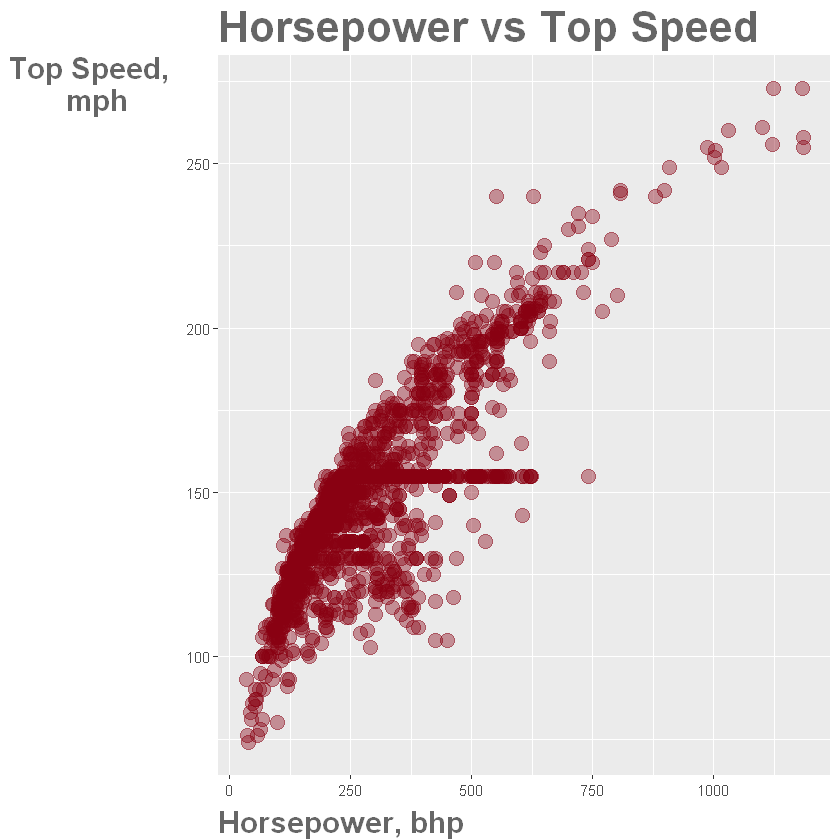

In [6]:
## preliminary data inspection
# Horsepower vs Top Speed
ggplot(data=df.car_spec_data, aes(x=horsepower_bhp, y=top_speed_mph)) + geom_point(alpha=.4, size=4, color="#880011") + ggtitle("Horsepower vs Top Speed") +
labs(x="Horsepower, bhp", y="Top Speed, \n mph") + theme.car_chart_SCATTER

There is an odd feature though: see that “stripe” of points at about top_speed_mph=150? What is that?

When I started exploring this data, I noticed that feature in the data and remembered “governor systems” that limit a car’s maximum speed. But, I didn’t remember the exact details of those systems. After some research, I learned more about speed limiter systems on Wikipedia, but some of the details were still a little fuzzy.

Having said that, let’s see if we can uncover more information in our dataset itself.

First, let’s look at the speed variable alone. We’ll make a histogram to show the distribution of car speeds.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 10 rows containing non-finite values (stat_bin)."Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y

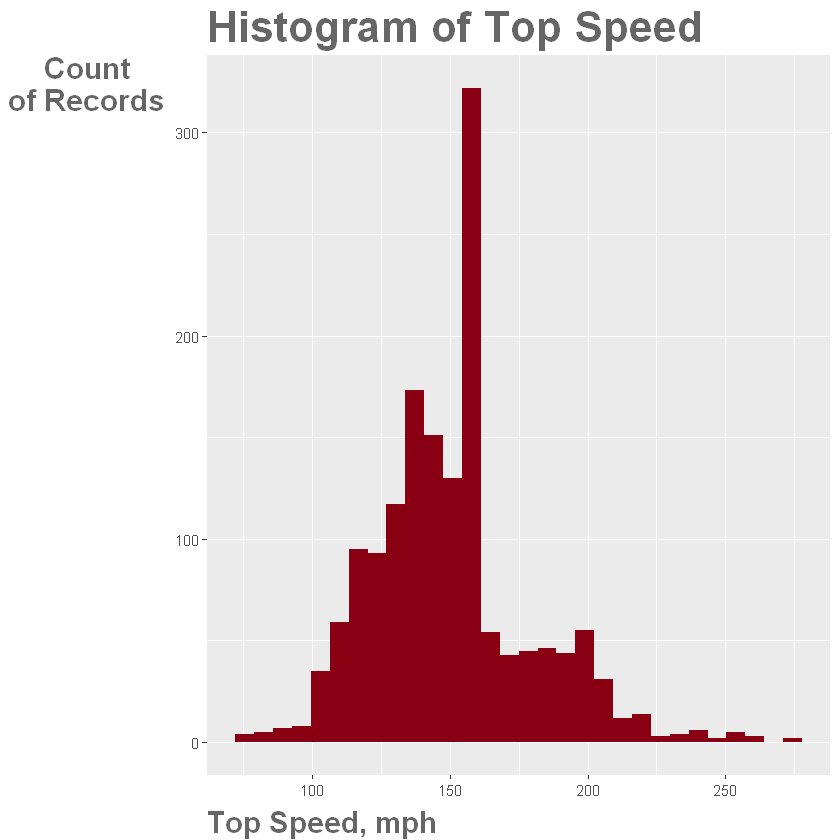

In [8]:
## Histogram of Top Speed
ggplot(data=df.car_spec_data, aes(x=top_speed_mph)) + geom_histogram(fill="#880011") +
ggtitle("Histogram of Top Speed") +
labs(x="Top Speed, mph", y="Count\nof Records") +
theme.car_chart_HIST

Typically, histograms allow us to see the distribution of a variable; the general shape.

Indeed, this histogram is helping us see the distribution of speeds for this dataset of high-performance cars.

But in this particular case, it’s helping us investigate something specific. It reveals more information about the feature we identified above in our scatterplot: there’s a large number of cars that max out at 150 to 155 miles per hour.

But still, the resolution of the chart doesn’t allow us to perfectly identify the spike.

So, we’ll zoom in one more time, by first subsetting our dataset to records where speed is between 149 and 159. Then we’ll pipe that output into ggplot() using the %>% operator and make a bar chart.

This will allow us to identify that spike more specifically.

Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

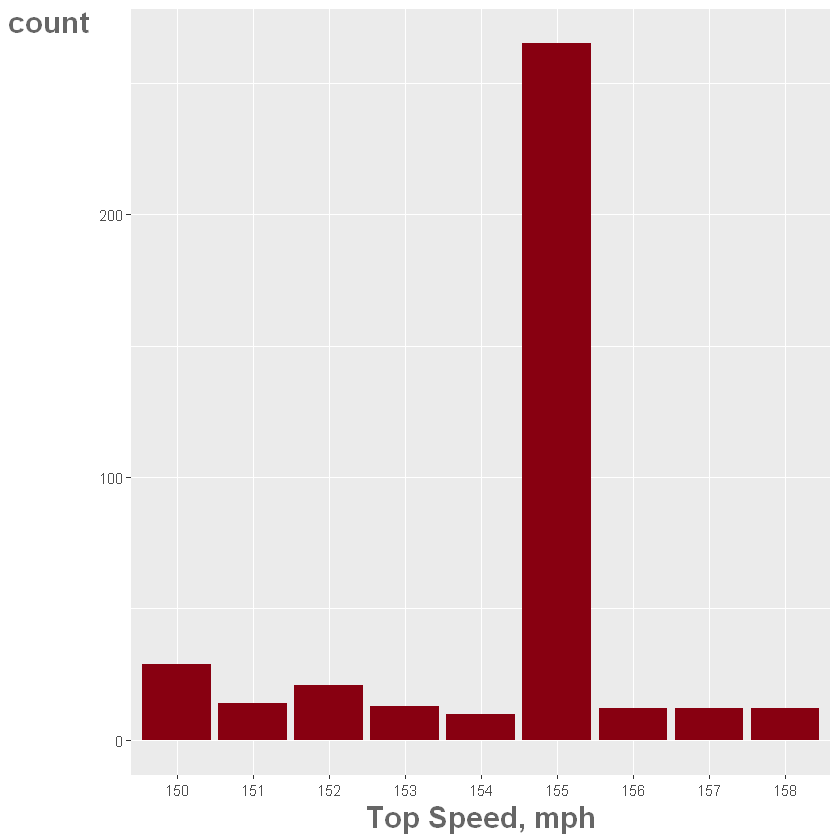

In [9]:
#----------------------------------
# ZOOM IN ON SPEED CONTROLLED CARS
#
# What is the 'limited' speed?
#  (create bar chart)
#----------------------------------
df.car_spec_data %>% filter(top_speed_mph > 149 & top_speed_mph <159) %>%
ggplot(aes(x=as.factor(top_speed_mph))) + geom_bar(fill="#880011") +
labs(x="Top Speed, mph") + theme.car_chart

Ok, now you can immediately see the spike at 155 mph.

There’s another question we could ask: assuming this spike is due to “speed limiters,” when did they start being used?

## Top Speed by Decade


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 10 rows containing non-finite values (stat_bin)."Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y

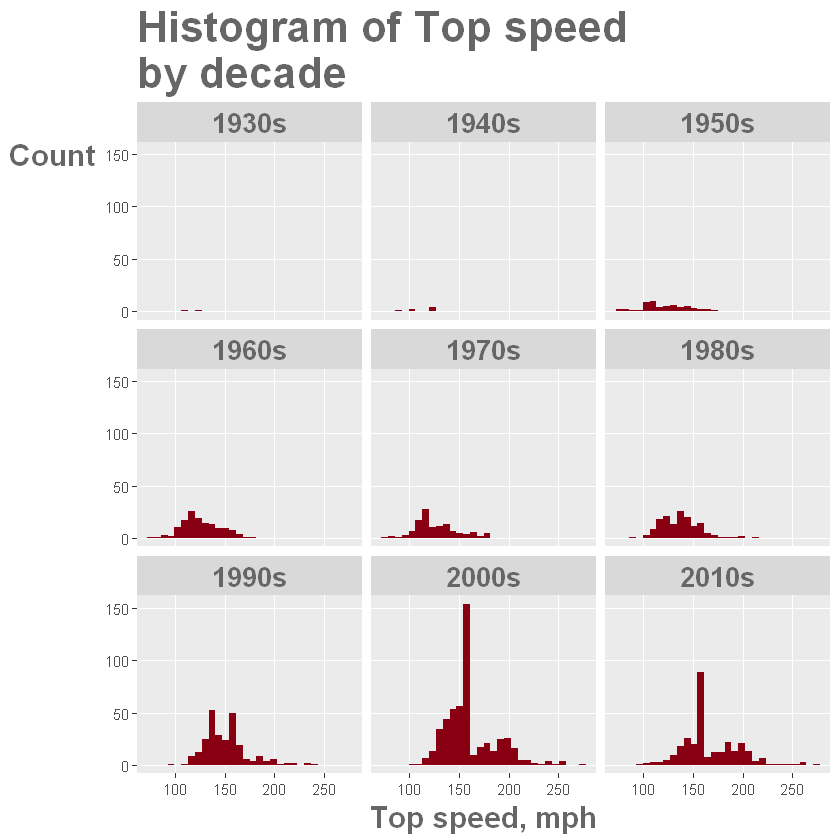

In [10]:
## histogram of Top Speed by DECADE
ggplot(data=df.car_spec_data, aes(x=top_speed_mph)) +
geom_histogram(fill="#880011") +
ggtitle("Histogram of Top speed\nby decade") +
labs(x="Top speed, mph", y="Count") +
facet_wrap(~decade) +
theme.car_chart_SMALLM

Ok, we can quickly see that this spike begins sometime in the 90s.

We could dive deeper with a line chart to identify the exact year, but this is good enough for right now.

Let’s do one more thing. I’m curious about which car companies are limiting car speeds. Let’s create a quick list of car companies. We’ll do that by using several dplyr verbs chained together: we’ll filter the data down to cars made after 1990 with a top speed of 155, then group our data by car manufacturer (make_nm), and count the number of cars.

In [11]:
#-------------------------------
# TABLE OF CAR COMPANIES WITH 
#  CARS AT MAX SPEED = 155
#-------------------------------
df.car_spec_data %>% filter(top_speed_mph == 155 & year>=1990) %>%
group_by(make_nm) %>%
summarize(count_speed_controlled =n()) %>%
arrange(desc(count_speed_controlled))

make_nm,count_speed_controlled
BMW,53
Audi,51
Mercedes,41
Jaguar,14
Nissan,9
Subaru,7
Volkswagen(VW),7
Volvo,7
Ford,5
Mitsubishi,5


At this point, we’ve gone from identifying a unique feature, and “drilled down” into the dataset to identify exact car companies related to that data-feature.

We’ve gone from an overview, found something interesting, and “zoomed in” to get richer details.

I want to you remember this. This is an important principle:

Overview first, zoom and filter, then details-on-demand

We’ve revealed details by following a specific process: overview first, zoom and filter, then details on demand. (This visual-information seeking mantra was originally described by Ben Shneiderman.)

We started with a high-level view with a chart of horsepower vs speed. Then, we saw something that looked unusual and “took a closer look” by examining the speed variable independently. We did this by filtering our data and using new charts to “zoom in.”

Finally, we gathered an initial set of details by creating list of car companies that have (probably) been using speed limiter systems. We’ve uncovered details about what was causing the data-feature in question.

Hypothetically, we could do more research (or ask a team member to do more research). We could read about these systems, talk to subject matter experts, etc.

To recap, we started with a high-level overview, and used filtering and different chart types to zoom in.

This is important. Learn to approach data exploration in this way.

Let’s move on and explore our data with some more visualizations.

## Horsepower vs Speed

Warning message:
"Removed 10 rows containing missing values (geom_point)."Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message 

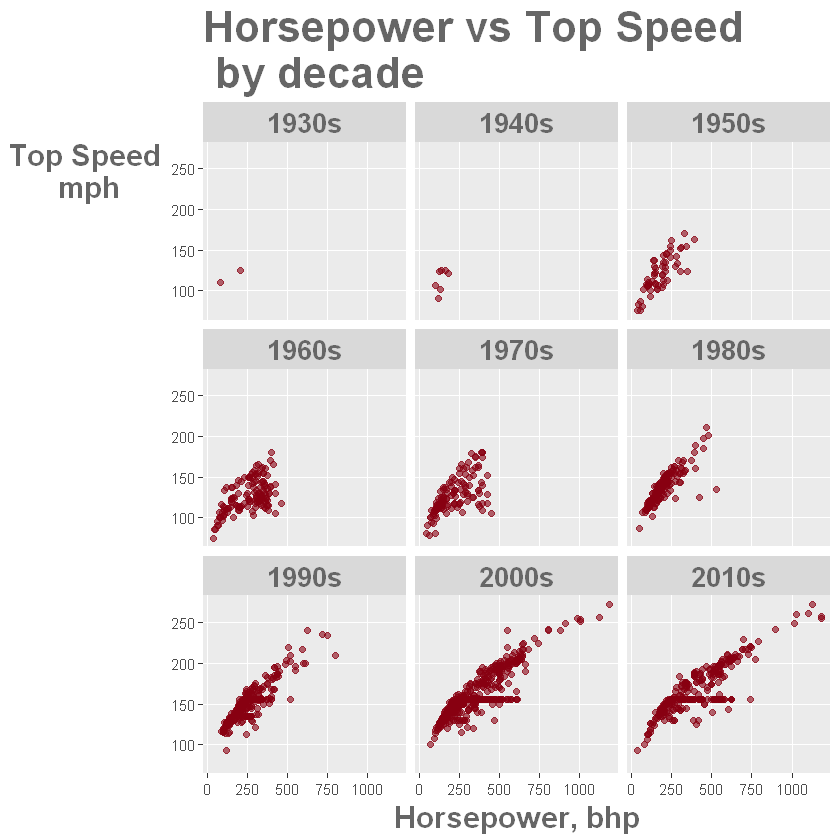

In [12]:
## BHP by Speed (faceted: decade)
ggplot(data=df.car_spec_data, aes(x=horsepower_bhp, y=top_speed_mph)) +
geom_point(alpha=.6, color="#880011") +
facet_wrap(~decade) + 
ggtitle("Horsepower vs Top Speed\n by decade") +
labs(x="Horsepower, bhp", y="Top Speed\n mph") +
theme.car_chart_SMALLM

In the ’60s and ’70s, you can see increases in horsepower, but just looking at the graphs, the correlation between horsepower and top speed isn’t that tight. (My suspicion is that the “slow” cars with high-BHP were heavy cars. If we wanted, we could “zoom in” on that and get more details. In the interest of time, we won’t investigate right now.)

In the ’80s though, the correlation between BHP and speed becomes much tighter.

Later, through the ’80s and ’90s, you see some mild increases in horsepower and speed, but in the 2000s, you start to see the rise of the proper ‘supercar;’ cars appear with horsepower well over 750 and even over 1000.

## Evolution of Top speed over time

We just investigated how horsepower and speed have evolved decade-by-decade using a small multiple chart, but I’m curious about speed specifically.

Let’s get more detail by plotting the top speed of every car vs the year the car was made.

Warning message:
"Removed 10 rows containing missing values (geom_point)."Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

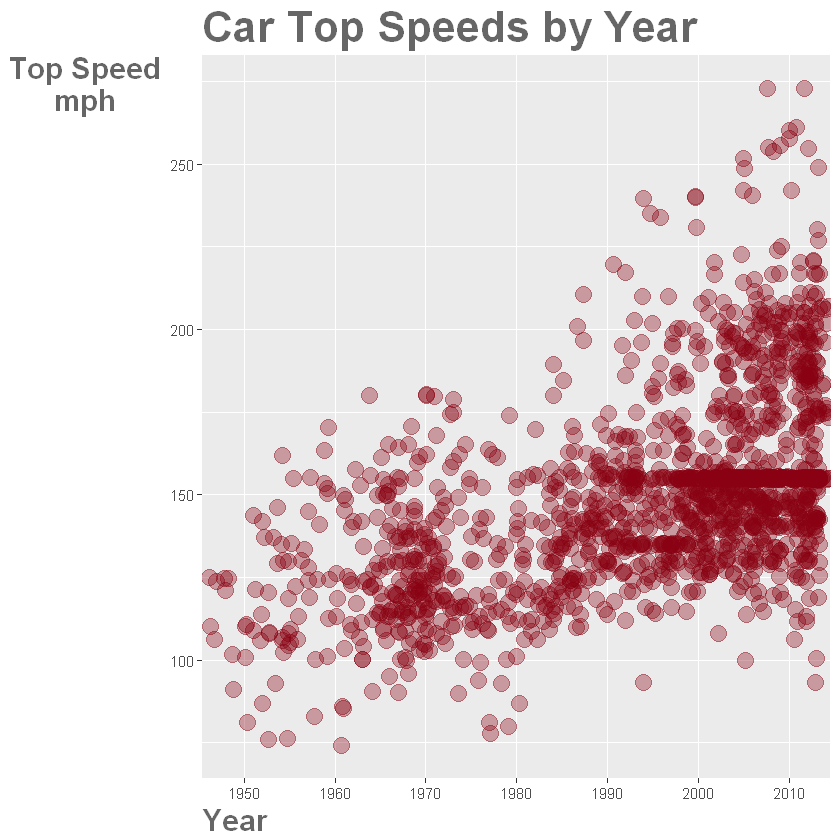

In [15]:
# Top speed vs year (all cars)
ggplot(data=df.car_spec_data, aes(x=year, y=df.car_spec_data$top_speed_mph)) + 
geom_point(alpha=.35, size=4.5, color="#880011", position = position_jitter()) +
scale_x_discrete(breaks=c("1950", "1960", "1970","1980","1990","2000","2010")) +
ggtitle("Car Top Speeds by Year") +
labs(x="Year", y="Top Speed\nmph") + theme.car_chart_SCATTER


Note again that in the ’90s, you can start to see the emergence of speed-limited cars.

Next, let’s plot the fastest car of each year. This will show more specifically how the speed of high-performance cars has changed over time.

`geom_smooth()` using method = 'loess'
Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

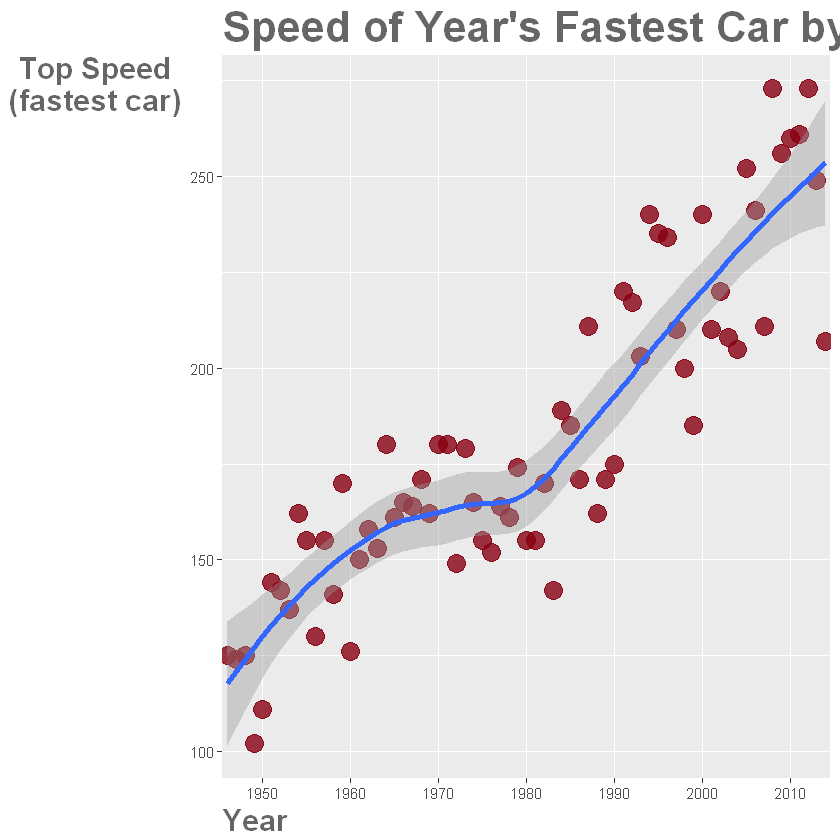

In [16]:
#------------------------------------------
# PLOT: Maximum Speed (fastest car) by Year
#------------------------------------------
df.car_spec_data %>% group_by(year) %>%
summarize(max_speed = max(top_speed_mph, na.rm=TRUE)) %>%
ggplot(aes(x=year, y=max_speed, group=1)) +
geom_point(size=5, alpha=.8, color="#880011") +
stat_smooth(method="auto", size=1.5) +
scale_x_discrete(breaks=c("1950","1960","1970","1980","1990","2000","2010")) +
ggtitle("Speed of Year's Fastest Car by Year") +
    labs(x="Year",y="Top Speed\n(fastest car)") +
    theme.car_chart_SCATTER

You can see that the speed gains start leveling off through the mid-70s, but right around ’78 to ’80, the slope of the line changes. Cars seem to be getting faster year-over-year since about 1980.

Note what we’ve done to create this chart. We:

Started with the df.car_spec_data data frame
Aggregated by year, using group_by()
Created a summarized variable using summarize()
And then plotted a scatterplot using ggplot().
Each of these steps uses a basic tool from ggplot2 or dplyr, and we’re “wiring” them together using the %>% operator.

Said differently, we’re combining very simple components from ggplot2 and dplyr to create a new visualization using only a few lines of code.

Let’s keep going and investigate 0 to 60 times.

## 0-60 Time

Warning message:
"Removed 1181 rows containing missing values (geom_point)."

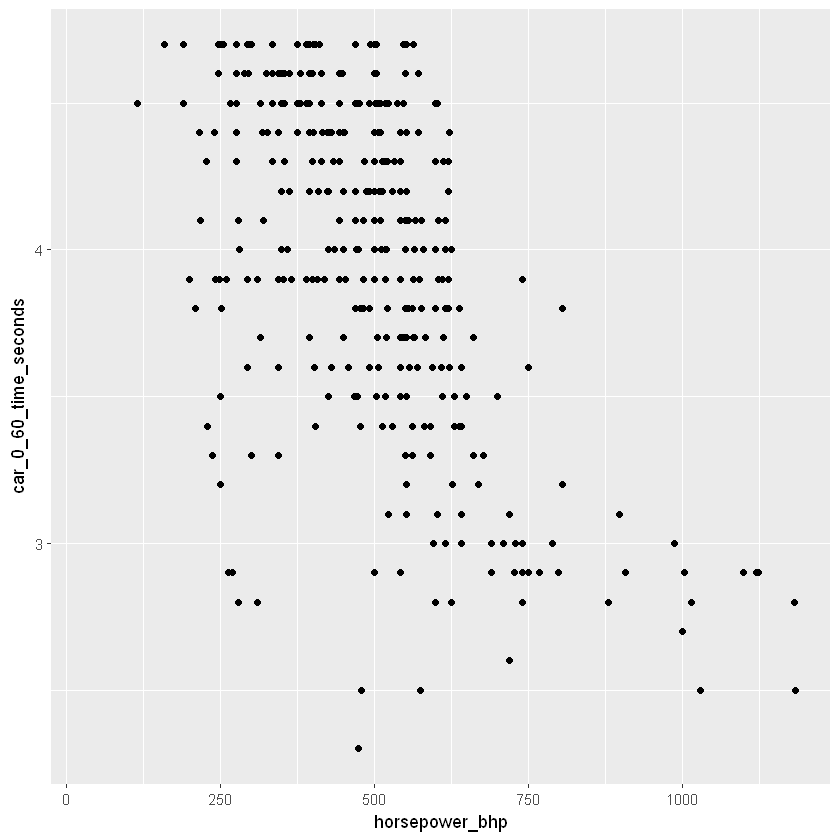

In [18]:
#---------------------------
# 0-to-60 by Horsepower
#  version 1
#---------------------------
ggplot(data=df.car_spec_data, aes(x=horsepower_bhp, y=car_0_60_time_seconds)) +
geom_point()

Notice that there’s some “overlap” in the way this data is plotted, which obscures some of the information.

To rectify this overlap, I’m going to introduce some random noise using the “jittering” technique.

“Jittering” our data and adding random noise to the position of each point will reduce the overlap and allow us to see all of the data points more clearly.

By showing you this draft above first, I want to remind you of the iterative process of designing data visualizations that I’ve covered before.

Warning message:
"Removed 1181 rows containing missing values (geom_point)."

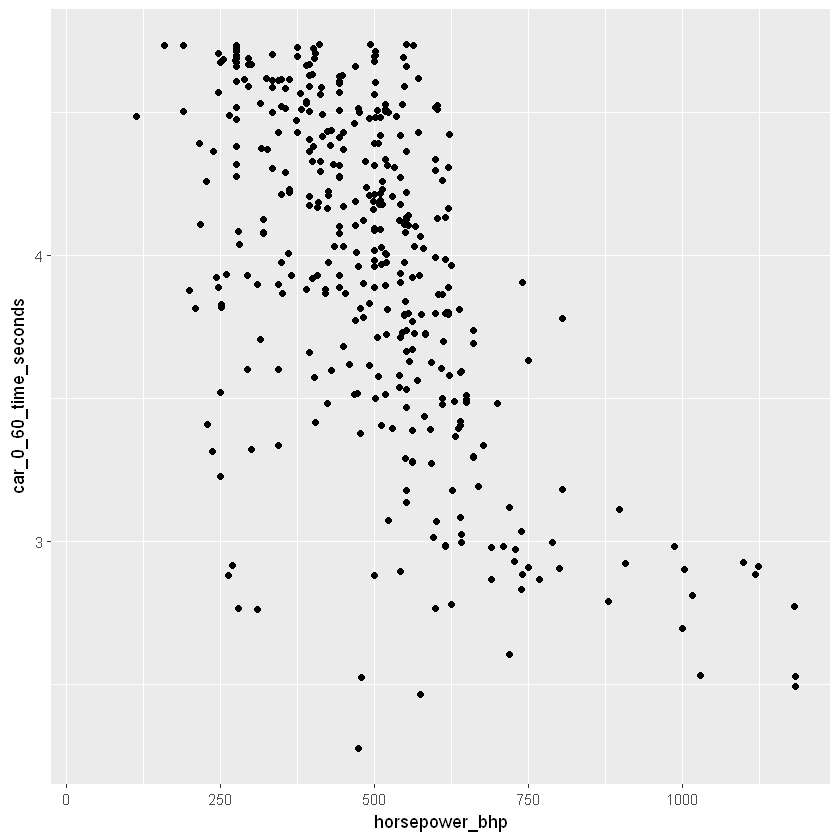

In [19]:
#--------------------------
# 0-to-60 by Horsepower
#  version 2 
#  ADD JITTER
#--------------------------

ggplot(data=df.car_spec_data, aes(x=horsepower_bhp,y=car_0_60_time_seconds)) +
  geom_point(position="jitter")

Here, we’ve used position=”jitter” inside of geom_point(). This introduces the random noise mentioned above.

Notice that in this case, the jittering technique makes the general “shape” of the data more apparent.

Now that we’ve jittered the data to reveal a clearer scatterplot pattern, we’ll format it and finalize the plot.

`geom_smooth()` using method = 'gam'
Warning message:
"Removed 1181 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1181 rows containing missing values (geom_point)."Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Cal

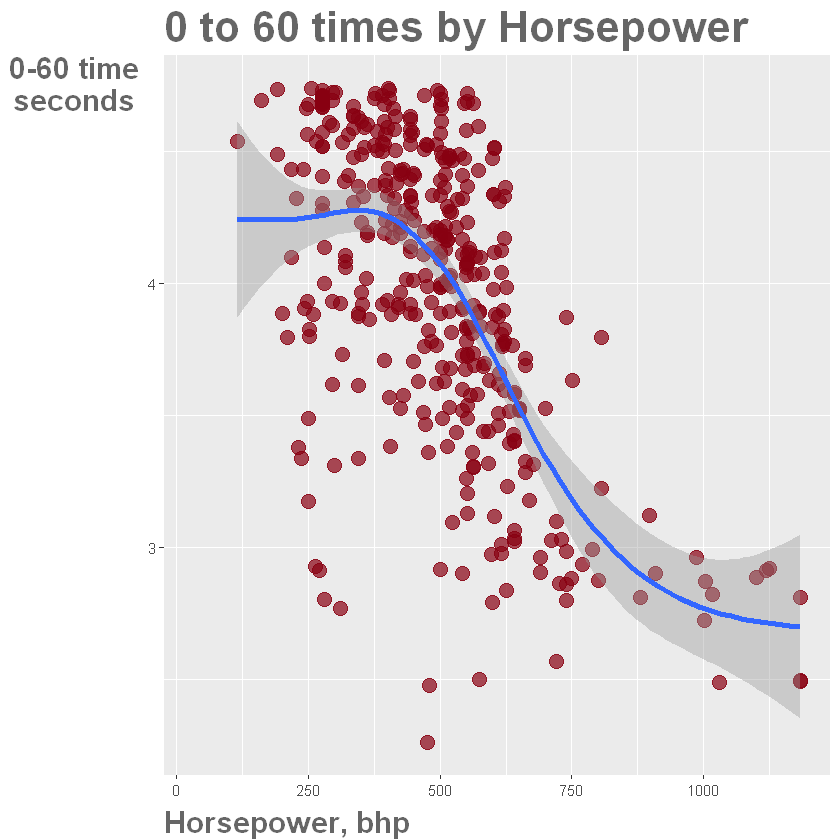

In [20]:
#--------------------------
# 0-to-60 by Horsepower
#  version 3
#  THEMED (Final)
#--------------------------

ggplot(data=df.car_spec_data, aes(x=horsepower_bhp,y=car_0_60_time_seconds)) +
  geom_point(size=4, alpha=.7,color="#880011",position="jitter") +
  stat_smooth(method="auto",size=1.5) +
  ggtitle("0 to 60 times by Horsepower") +
  labs(x="Horsepower, bhp",y="0-60 time\nseconds") +
  theme.car_chart_SCATTER

Here, we’ve formatted the scatterplot with the theme.car_chart_SCATTER theme, and added a title and labels. We’ve also added a line that fits the data using stat_smooth().

## 0-60 vs Horsepower-per-Tonne

The above scatterplot of horsepower doesn’t tell the whole story.

What actually matters for 0-60 time isn’t just how much horsepower, but also the weight of the car (not to mention, torque, which we’ll investigate in a second).

`geom_smooth()` using method = 'gam'
Warning message:
"Removed 1181 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1181 rows containing missing values (geom_point)."Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Cal

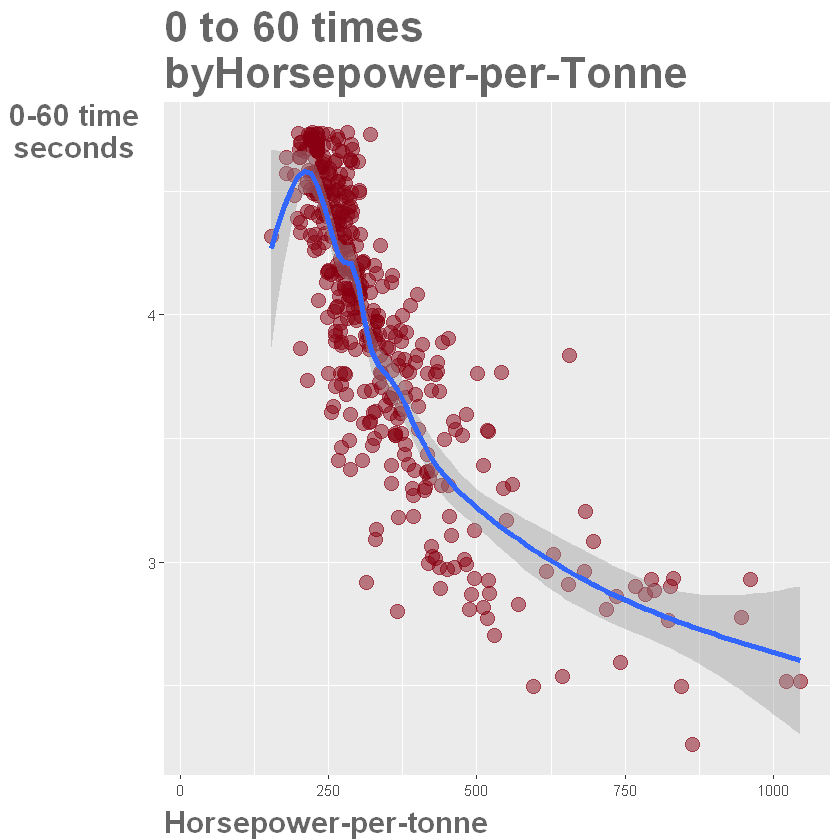

In [21]:
#######################
# Horsepower Per Tonne
#######################

#--------------------------
# 0-to-60 by Horsepower-per-tonne
#  THEMED (Final)
#--------------------------

ggplot(data=df.car_spec_data, aes(x=horsepower_per_ton_bhp,y=car_0_60_time_seconds)) +
  geom_point(size=4, alpha=.5,color="#880011",position="jitter") +
  stat_smooth(method="auto",size=1.5) +
  ggtitle("0 to 60 times\nbyHorsepower-per-Tonne") +
  labs(x="Horsepower-per-tonne",y="0-60 time\nseconds") +
  theme.car_chart_SCATTER

The relationship between 0-60 time and horsepower-per-tonne is much tighter than the above chart of 0-60 vs horsepower.

Let’s try one more. We’ll make a similar chart for torque-per-tonne.

## 0-60 vs Torque-per-Tonne

`geom_smooth()` using method = 'gam'
Warning message:
"Removed 1182 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1182 rows containing missing values (geom_point)."Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Cal

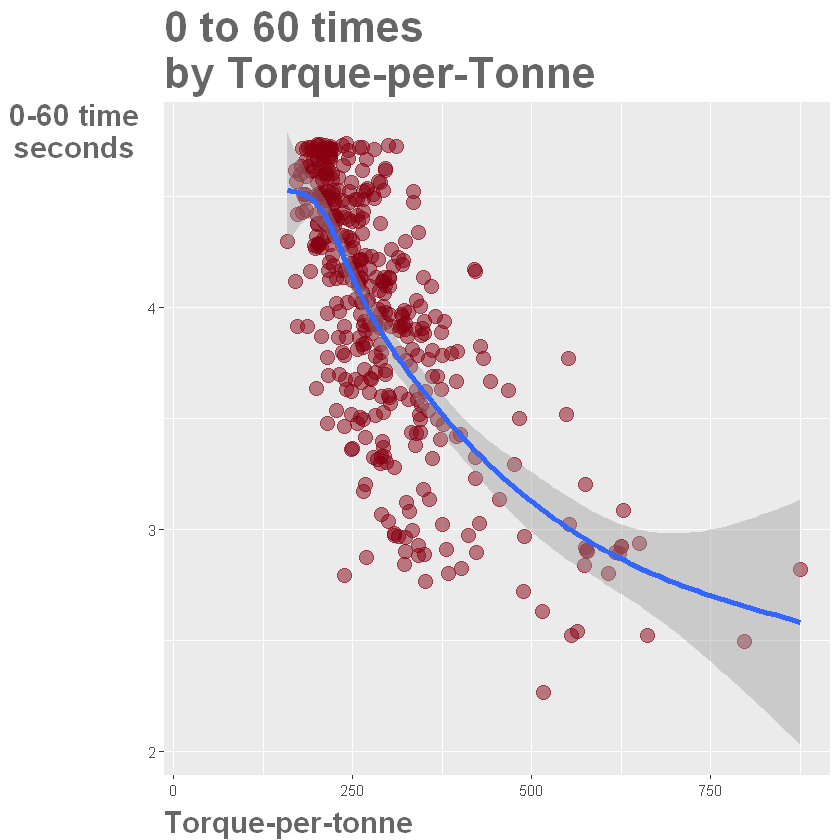

In [22]:
#--------------------------
# 0-to-60 by Torque-per-tonne
#  THEMED (Final)
#--------------------------

ggplot(data=df.car_spec_data, aes(x=df.car_spec_data$torque_per_ton,y=car_0_60_time_seconds)) +
  geom_point(size=4, alpha=.5,color="#880011",position="jitter") +
  stat_smooth(method="auto",size=1.5) +
  ggtitle("0 to 60 times\nby Torque-per-Tonne") +
  labs(x="Torque-per-tonne",y="0-60 time\nseconds") +
  theme.car_chart_SCATTER

## Fastest Cars

Ok, since this post deals with supercars, we’ll make a list of the 10 fastest cars.

Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

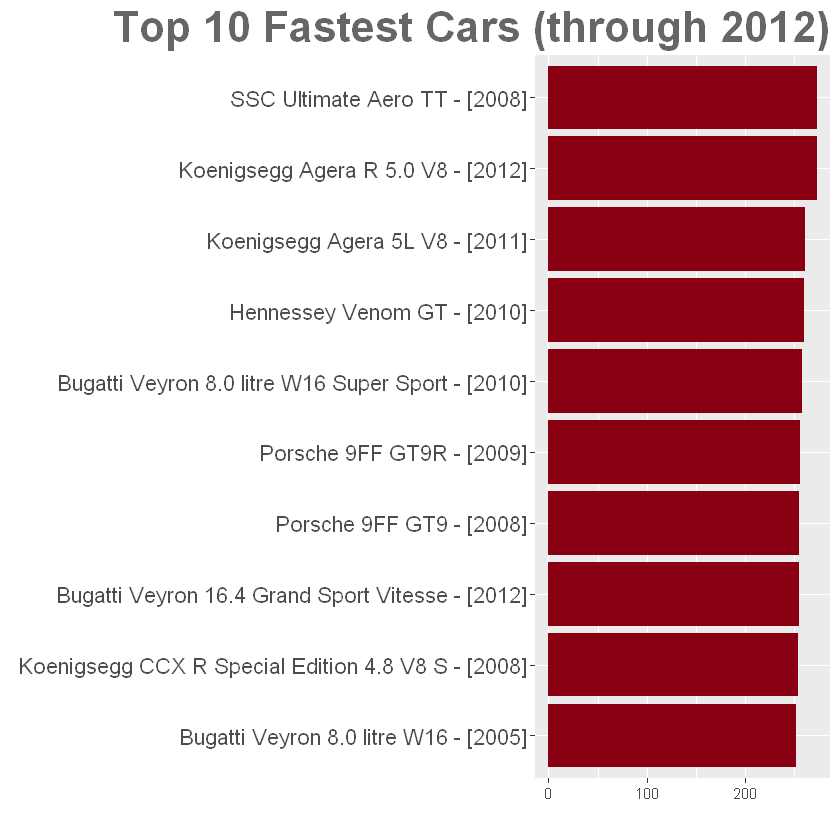

In [24]:
#----------------------
# Bar Chart
#  top 10 fastest cars
#----------------------
df.car_spec_data %>%
  select(car_full_nm,top_speed_mph) %>%
  filter(min_rank(desc(top_speed_mph)) <= 10) %>%
  arrange(desc(top_speed_mph)) %>%
  ggplot(aes(x=reorder(car_full_nm,top_speed_mph), y=top_speed_mph)) +
    geom_bar(stat="identity",fill="#880011") +
    coord_flip() +
    ggtitle("Top 10 Fastest Cars (through 2012)") +
    labs(x="",y="") +
    theme.car_chart +
    theme(axis.text.y = element_text(size=rel(1.5))) +
    theme(plot.title = element_text(hjust=1))

## Lets annotate a chart

mapping: x = x, y = y 
geom_text: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

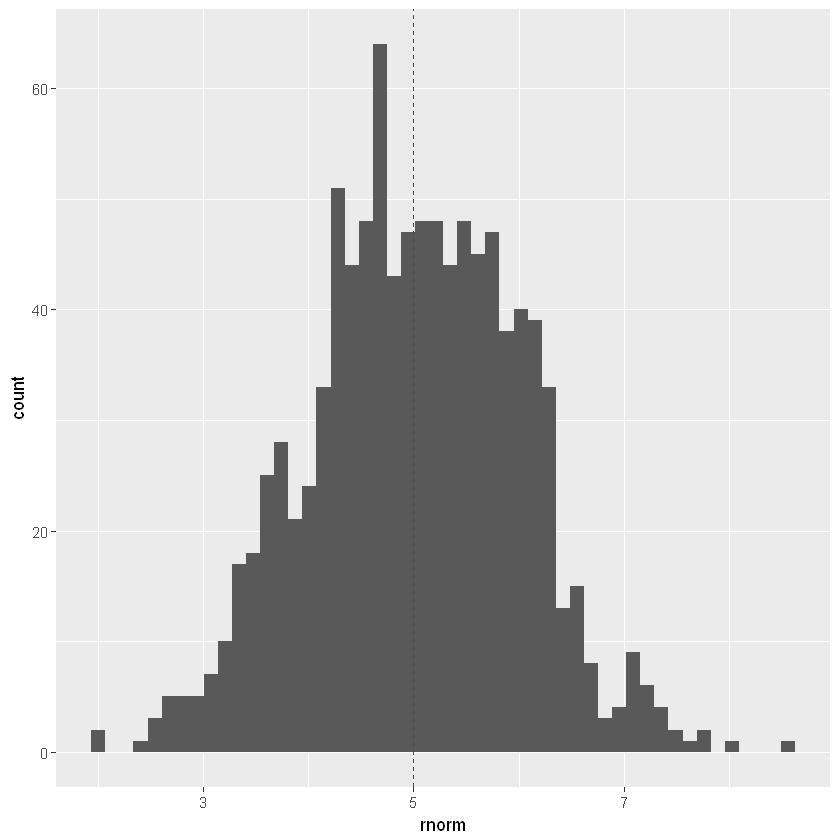

In [29]:
set.seed(10)
df.norm <- data.frame(rnorm = rnorm(1000, mean=5))
ggplot(data=df.norm, aes(x=rnorm)) +
geom_histogram(bins=50) +
geom_vline(xintercept=5, color="red", linetype="dashed")
#annotate("text", label = "Mean = 5", x = 4.5, y = 170, color = "red")

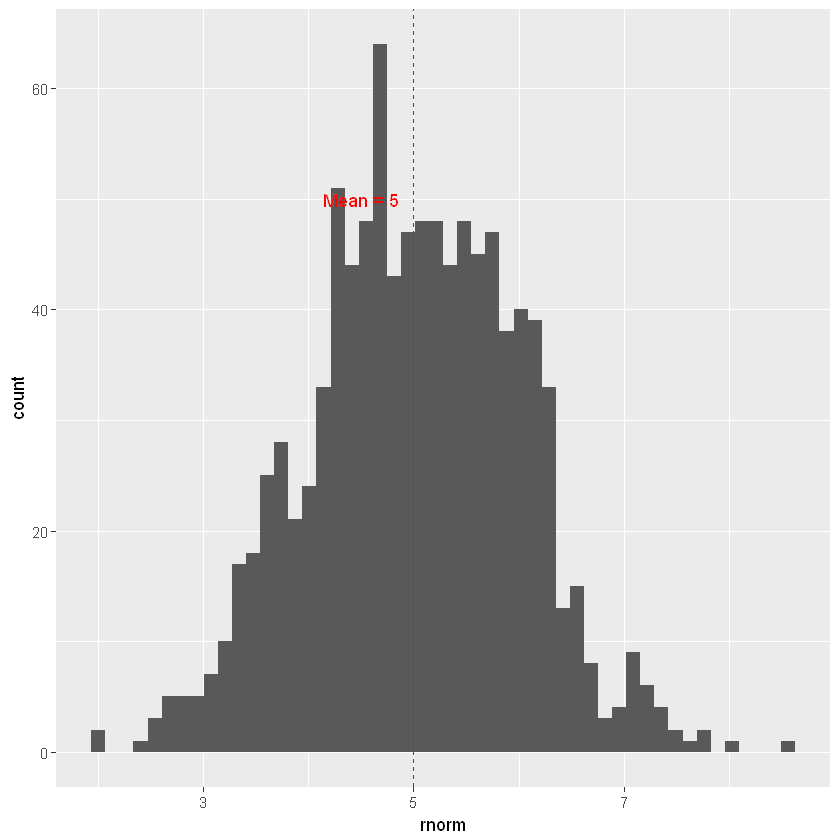

In [36]:
ggplot(data = df.norm, aes(x = rnorm)) +
  geom_histogram(bins = 50) +
  geom_vline(xintercept = 5, color = "red", linetype = "dashed") +
  annotate("text", label = "Mean = 5", x = 4.5, y = 50, color = "red")

## Create a Heatmap

In [37]:
#------------------
# CREATE DATA FRAME
#------------------

df.team_data <- expand.grid(teams = c("Team A", "Team B", "Team C", "Team D")
                           ,metrics = c("Metric 1", "Metric 2", "Metric 3", "Metric 4", "Metric 5")
                           )
# add variable: performance
set.seed(41)
df.team_data$performance <- rnorm(nrow(df.team_data))

#inspect
head(df.team_data)

teams,metrics,performance
Team A,Metric 1,-0.7943683
Team B,Metric 1,0.1972575
Team C,Metric 1,1.0017043
Team D,Metric 1,1.2888254
Team A,Metric 2,0.9057534
Team B,Metric 2,0.4936675


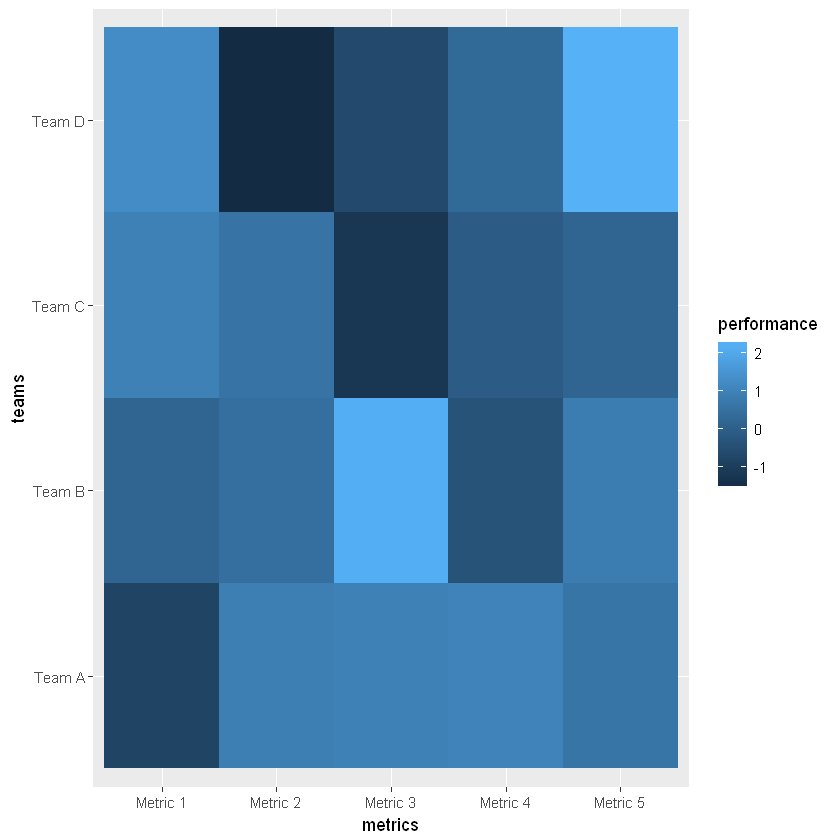

In [38]:
#---------------------------
# PLOT: heatmap
# - here, we use geom_tile()
#---------------------------

ggplot(data=df.team_data, aes(x=metrics, y=teams)) + geom_tile(aes(fill=performance))